In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/mnist.csv')

In [ ]:
data = np.array(data)
np.random.shuffle(data)
data = data.T

X = data[1:]
X = X / 255
Y = data[0]

In [ ]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def forward(X, W1, b1, W2, b2):
  Z1 = W1.dot(X) + b1
  A1 = relu(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def backward(X, Y, W2, Z1, A1, Z2, A2):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  dB2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * deriv_relu(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  dB1 = 1 / m * np.sum(dZ1)
  return dW1, dB1, dW2, dB2 

def update_params(W1, b1, W2, b2, dW1, dB1, dW2, dB2, alpha):
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * dB2
  W1 = W1- alpha * dW1
  b1 = b1 - alpha * dB1
  return W1, b1, W2, b2

def gradient_descent(X, Y, epochs, alpha):
  W1, b1, W2, b2 = init_params()

  for i in range(epochs):
    Z1, A1, Z2, A2 = forward(X, W1, b1, W2, b2)
    dW1, dB1, dW2, dB2 = backward(X, Y, W2, Z1, A1, Z2, A2)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, dB1, dW2, dB2, alpha)

    if i % 10 == 0:
      print('Epoch: ', i)
      print('Accuracy: ', get_accuracy(A2, Y))

  return W1, b1, W2, b2

def relu(Z):
  return np.maximum(Z, 0)

def deriv_relu(Z):
  return Z > 0

def softmax(Z):
  return np.exp(Z) / sum(np.exp(Z))

def one_hot(Y):
  one_hot_y = np.zeros((Y.size, Y.max() + 1))
  one_hot_y[np.arange(Y.size), Y] = 1
  return one_hot_y.T

def get_accuracy(A2, Y):
  predictions = np.argmax(A2, 0)
  accuracy = np.sum(predictions == Y) / Y.size
  return accuracy

def make_prediction(image, W1, b1, W2, b2):
  _, _, _, A2 = forward(image, W1, b1, W2, b2)
  predictions = np.argmax(A2, 0)
  return predictions[0]

def test_prediction(index, X, Y, W1, b1, W2, b2):
  current_image = np.array(X[:, index]).reshape(28, 28) * 255
  prediction = make_prediction(np.array(X[:, index]), W1, b1, W2, b2)
  label = Y[index]

  print('Label: ', label)
  print('Prediction: ', prediction)

  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

In [ ]:
W1, b1, W2, b2 = gradient_descent(X, Y, 600, 0.1)

Epoch:  0
Accuracy:  0.102
Epoch:  10
Accuracy:  0.1227
Epoch:  20
Accuracy:  0.1563
Epoch:  30
Accuracy:  0.1896
Epoch:  40
Accuracy:  0.2278
Epoch:  50
Accuracy:  0.2594
Epoch:  60
Accuracy:  0.2866
Epoch:  70
Accuracy:  0.3568
Epoch:  80
Accuracy:  0.3941
Epoch:  90
Accuracy:  0.4319
Epoch:  100
Accuracy:  0.4714
Epoch:  110
Accuracy:  0.5026
Epoch:  120
Accuracy:  0.5291
Epoch:  130
Accuracy:  0.5554
Epoch:  140
Accuracy:  0.5805
Epoch:  150
Accuracy:  0.5983
Epoch:  160
Accuracy:  0.6146
Epoch:  170
Accuracy:  0.6308
Epoch:  180
Accuracy:  0.644
Epoch:  190
Accuracy:  0.6585
Epoch:  200
Accuracy:  0.6739
Epoch:  210
Accuracy:  0.6864
Epoch:  220
Accuracy:  0.7
Epoch:  230
Accuracy:  0.7103
Epoch:  240
Accuracy:  0.7204
Epoch:  250
Accuracy:  0.7302
Epoch:  260
Accuracy:  0.7409
Epoch:  270
Accuracy:  0.7498
Epoch:  280
Accuracy:  0.7592
Epoch:  290
Accuracy:  0.7667
Epoch:  300
Accuracy:  0.7715
Epoch:  310
Accuracy:  0.7783
Epoch:  320
Accuracy:  0.784
Epoch:  330
Accuracy:  0.78

Label:  7
Prediction:  6


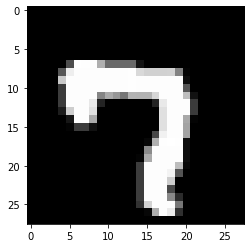

Label:  4
Prediction:  4


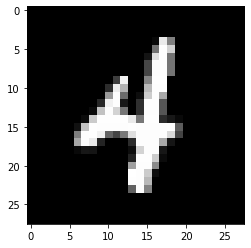

Label:  6
Prediction:  4


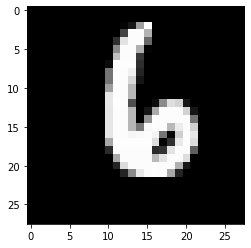

Label:  0
Prediction:  4


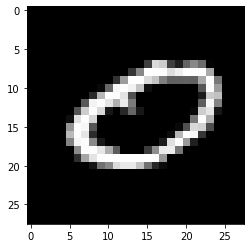

Label:  4
Prediction:  4


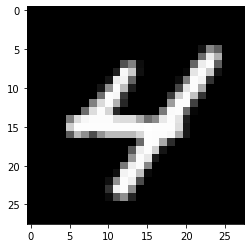

Label:  3
Prediction:  6


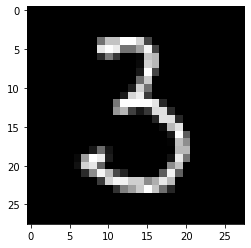

Label:  1
Prediction:  4


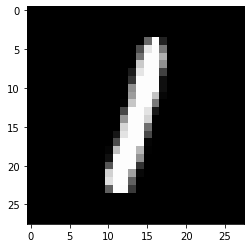

Label:  6
Prediction:  6


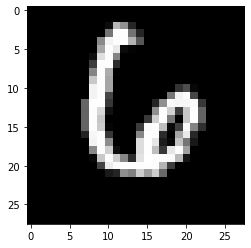

Label:  3
Prediction:  6


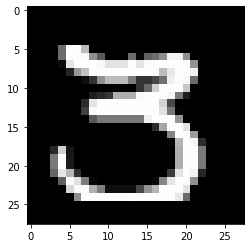

Label:  5
Prediction:  4


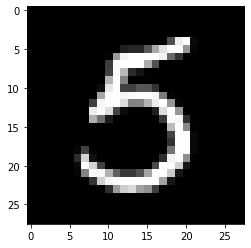

In [ ]:
for i in range(10):
  test_prediction(i, X, Y, W1, b1, W2, b2)